In [1]:
%%capture
%run preprocessing.ipynb

In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC

def train_and_results(results, model, X_train, X_test, y_train, y_test, kernel, decision_function, g=None, c=None, d=None):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    results.append({'kernel': kernel,'decision function': decision_function, 'gamma': g, 'coef0': c , 'degree': d,'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1})


# Load data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Hyperparamenters
max_iter = 500000
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
degrees = [1,2,3,4,5]
random_state = 42
decision_function_shape = ['ovo', 'ovr']
gamma = ['scale', 'auto']
coef0 = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0 ,1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10]

# Grid search
results = []
counter = 1

for kernel in kernels:

    # Each kernel has different parameters
    if kernel == 'linear':
        for decision_function in decision_function_shape:
            model = SVC(kernel=kernel, random_state=random_state, decision_function_shape=decision_function, max_iter=max_iter)
            train_and_results(results, model, X_train, X_test, y_train, y_test, kernel, decision_function)
            print("I did " + str(counter) + " models")
            counter += 1

    elif kernel == 'poly':
        for decision_function in decision_function_shape:
            for g in gamma:
                for c in coef0:
                    for d in degrees:
                        model = SVC(kernel=kernel, random_state=random_state, decision_function_shape=decision_function, gamma=g, coef0=c, degree=d, max_iter=max_iter)
                        train_and_results(results, model, X_train, X_test, y_train, y_test, kernel, decision_function, g, c, d)
                        print("I did " + str(counter) + " models")
                        counter += 1

    elif kernel == 'rbf':
        for decision_function in decision_function_shape:
            for g in gamma:
                model = SVC(kernel=kernel, random_state=random_state, decision_function_shape=decision_function, gamma=g, max_iter=max_iter)
                train_and_results(results, model, X_train, X_test, y_train, y_test, kernel, decision_function, g)
                print("I did " + str(counter) + " models")
                counter += 1

    elif kernel == 'sigmoid':
        for decision_function in decision_function_shape:
            for g in gamma:
                for c in coef0:
                    model = SVC(kernel=kernel, random_state=random_state, decision_function_shape=decision_function, gamma=g, coef0=c, max_iter=max_iter)
                    train_and_results(results, model, X_train, X_test, y_train, y_test, kernel, decision_function, g, c)
                    print("I did " + str(counter) + " models")
                    counter += 1

print("OMG I'm done!")

In [3]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
import pandas as pd
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
import numpy as np

# Load data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Define the parameter space
param_distributions = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'decision_function_shape': ['ovo', 'ovr'],
    'gamma': ['scale', 'auto'],
    'coef0': uniform(-10, 20),  # uniform distribution from -10 to 10
    'degree': randint(1, 6),  # integer values from 1 to 5
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(SVC(random_state=42, max_iter=1000000), param_distributions, n_iter=100, scoring=scoring , refit='f1',cv=5, n_jobs=-1)

# Fit it to the data
random_search.fit(X_train, y_train)

# Get the results
results = random_search.cv_results_

# Get the best parameters
best_params = random_search.best_params_

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [4]:
import pandas as pd
from pandas import read_csv

results = read_csv('results.csv')
# Print results in a table
results_df = pd.DataFrame(results)


In [5]:
# Order by f1 value

results_df=results_df.sort_values(by=['mean_test_f1'], ascending=False)

# Show the top 5 models with the best f1 score
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_coef0,param_decision_function_shape,param_degree,param_gamma,param_kernel,params,...,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
69,346.225787,21.246137,4.058156,0.095174,5.287026,ovr,4,scale,poly,"{'coef0': 5.287025934181461, 'decision_functio...",...,0.000467,1,0.976998,0.977001,0.976591,0.976133,0.977538,0.976852,0.000469,1
47,255.952747,4.734957,4.139737,0.139779,4.019437,ovo,4,auto,poly,"{'coef0': 4.019437185126822, 'decision_functio...",...,0.000518,2,0.977079,0.976629,0.977206,0.975925,0.977373,0.976842,0.000521,2
3,430.089342,118.197509,3.957639,0.104976,2.657199,ovo,5,auto,poly,"{'coef0': 2.657199049959644, 'decision_functio...",...,0.000752,3,0.977452,0.977125,0.976716,0.975391,0.977373,0.976811,0.000755,3
8,1117.633574,63.828609,4.219815,0.135850,9.841431,ovr,4,auto,poly,"{'coef0': 9.841431268986355, 'decision_functio...",...,0.001046,4,0.976711,0.976463,0.977826,0.974938,0.977744,0.976737,0.001050,4
33,308.369436,14.347534,3.914575,0.141840,2.446741,ovo,5,auto,poly,"{'coef0': 2.446741218704913, 'decision_functio...",...,0.001618,5,0.976794,0.976220,0.977250,0.973704,0.978650,0.976524,0.001623,5


In [6]:
from sklearn.svm import SVC
import numpy as np
from sklearn import metrics 

X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

# Recreate the best model
best_by_f1 = results_df.iloc[0]
best_model_by_f1 = SVC(kernel=best_by_f1['param_kernel'], random_state=42, decision_function_shape=best_by_f1['param_decision_function_shape'], gamma=best_by_f1['param_gamma'], coef0=best_by_f1['param_coef0'], degree=best_by_f1['param_degree'], max_iter=1000000)

# Train the best model
best_model_by_f1.fit(X_train, y_train)

# Predict the test set
y_pred_f1 = best_model_by_f1.predict(X_test)

# Print the metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_f1))
print("Precision:", metrics.precision_score(y_test, y_pred_f1, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred_f1, average='weighted'))
print("F1:", metrics.f1_score(y_test, y_pred_f1, average='weighted'))


C:\Users\carla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.9782694457229272
Precision: 0.9783928003569219
Recall: 0.9782694457229272
F1: 0.9782461495788808


In [7]:
# Order by time of execution
results_df = results_df.sort_values(by=['mean_fit_time'], ascending=True)
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_coef0,param_decision_function_shape,param_degree,param_gamma,param_kernel,params,...,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
22,116.759433,2.502519,5.169049,0.064692,8.523257,ovo,2,auto,poly,"{'coef0': 8.523257347872246, 'decision_functio...",...,0.001024,11,0.974235,0.972751,0.973040,0.971098,0.973369,0.972899,0.001029,11
99,117.032908,10.335444,5.049159,0.310041,5.622508,ovo,2,auto,poly,"{'coef0': 5.622507667191915, 'decision_functio...",...,0.000979,14,0.973778,0.972337,0.972749,0.970806,0.972997,0.972533,0.000983,14
93,117.867452,10.465055,5.304003,0.066164,7.680969,ovr,2,auto,poly,"{'coef0': 7.680969214680509, 'decision_functio...",...,0.001058,12,0.974152,0.972627,0.972957,0.970890,0.973162,0.972758,0.001063,12
12,120.132539,26.237949,5.372851,0.236478,6.737602,ovo,2,scale,poly,"{'coef0': 6.737601755558021, 'decision_functio...",...,0.001080,13,0.974069,0.972503,0.972998,0.970765,0.973079,0.972683,0.001085,13
26,121.899046,3.171840,5.095881,0.122034,9.910280,ovo,2,scale,poly,"{'coef0': 9.910280288254377, 'decision_functio...",...,0.000969,10,0.974276,0.972876,0.973082,0.971306,0.973452,0.972998,0.000972,10


In [8]:
# Recreate the best model according to the time of execution
best_by_time = results_df.iloc[0]
best_model_by_time = SVC(kernel=best_by_time['param_kernel'], random_state=42, decision_function_shape=best_by_time['param_decision_function_shape'], gamma=best_by_time['param_gamma'], coef0=best_by_time['param_coef0'], degree=best_by_time['param_degree'], max_iter=1000000)

# Train the best model
best_model_by_time.fit(X_train, y_train)

# Predict the test set
y_pred_time = best_model_by_time.predict(X_test)

# Print the metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_time))
print("Precision:", metrics.precision_score(y_test, y_pred_time, average='weighted'))
print("Recall:", metrics.recall_score(y_test, y_pred_time, average='weighted'))
print("F1:", metrics.f1_score(y_test, y_pred_time, average='weighted'))


Accuracy: 0.9748175422447235
Precision: 0.9750396800912553
Recall: 0.9748175422447235
F1: 0.9747849899824981


<Axes: >

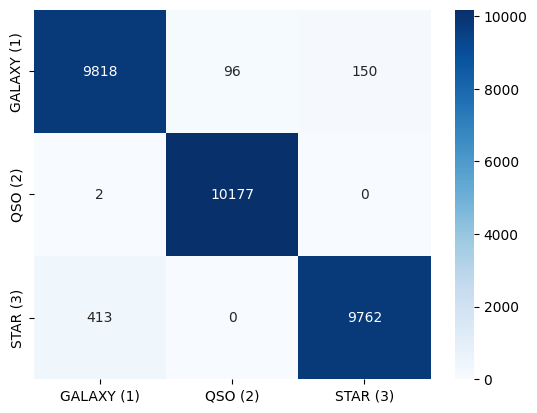

In [9]:
import seaborn as sns

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_f1)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

<Axes: >

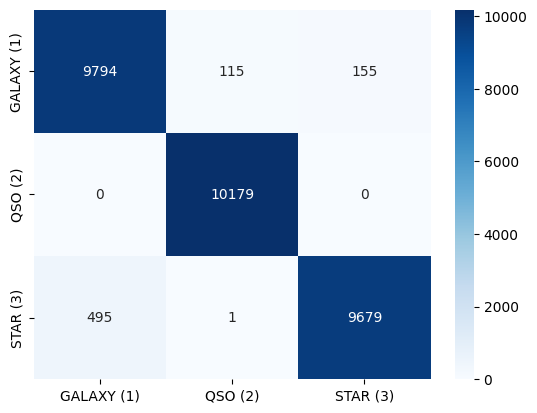

In [10]:
import seaborn as sns

# Confusion Matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_time)
labels = ['GALAXY (1)', 'QSO (2)', 'STAR (3)']

# Create a heatmap with the labels
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

In [ ]:
np.save('results.npy', results_df)
results_df.to_csv('results.csv', index=False)
results_df.to_pickle('results.pkl')